In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [2]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_mem_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_mem_labels_df.pkl"))

In [3]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# # Remove all the features that are not contains 'DVA' in their name
# features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

features_df.head()

,Movie,Gaze_Counts_In_RoI_Pre,Gaze_Counts_Out_RoI_Pre,Gaze_In_out_RoI_Ratio_Pre,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Rate_Pre,Fixations_Counts_In_RoI_Pre,Fixations_Counts_Out_RoI_Pre,Fixations_In_out_RoI_Ratio_Pre,Fixations_Re_Entries_To_RoI_Count_Pre,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,35,8.937330,-4.762770,2.538341,0.000000,0.000000,13.333333,-9.090909,3.933566,14.285714,...,1.309765,10.279088,-14.176672,-19.721653,-31.733400,15.995702,-0.180805,2.613137,7.635024,-19.176023
1,37,9.895988,-4.653699,3.004493,-4.545455,-4.566460,4.761905,-2.222222,1.698302,0.000000,...,-0.877868,6.086491,0.268451,2.169787,10.743866,7.255331,16.895147,-0.464304,4.377075,1.180890
2,24,0.000000,-0.381749,0.000000,0.000000,0.000000,0.000000,8.888889,0.000000,0.000000,...,-36.395763,-2.802580,12.923560,9.205766,17.757868,-9.350843,0.624062,0.094872,-21.961715,9.653264
3,56,0.000000,5.580803,0.000000,0.000000,0.000000,0.000000,-2.222222,0.000000,0.000000,...,1.457714,6.666489,0.261014,-0.954066,-2.668161,-19.692673,4.126229,31.312765,-14.002873,-2.052699
4,19,0.683507,0.218142,0.138565,13.636364,13.794626,0.000000,-2.222222,0.043290,0.000000,...,-1.665887,4.361691,3.270751,2.661907,6.803244,2.744960,-2.173159,0.784746,1.902217,0.664412


EDA

In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Movie                                         2040 non-null   int8   
 1   Gaze_Counts_In_RoI_Pre                        2036 non-null   float64
 2   Gaze_Counts_Out_RoI_Pre                       2036 non-null   float64
 3   Gaze_In_out_RoI_Ratio_Pre                     2036 non-null   float64
 4   Gaze_Re_Entries_To_RoI_Count_Pre              2036 non-null   float64
 5   Gaze_Re_Entries_To_RoI_Rate_Pre               2036 non-null   float64
 6   Fixations_Counts_In_RoI_Pre                   2036 non-null   float64
 7   Fixations_Counts_Out_RoI_Pre                  2036 non-null   float64
 8   Fixations_In_out_RoI_Ratio_Pre                2036 non-null   float64
 9   Fixations_Re_Entries_To_RoI_Count_Pre         2036 non-null   f

In [5]:
labels_df.head()

,mem
series_id,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [6]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2039
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mem     2040 non-null   float64
dtypes: float64(1)
memory usage: 31.9 KB


<AxesSubplot:>

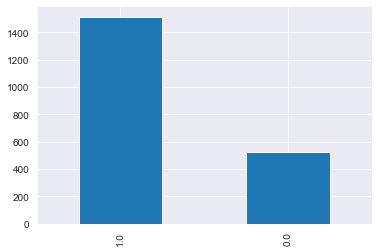

In [7]:
labels_df['mem'].value_counts().plot(kind='bar')

Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [8]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_ReEntry_Mean_Diff_Pre    0.386765
Pupil radius_Fixations_First_Diff_Pre           0.386765
onset_Max_Saccades_Start_In_RoI_Pre             0.305882
onset_Median_Saccades_Start_In_RoI_Pre          0.305882
onset_Std_Saccades_Start_In_RoI_Pre             0.305882
Duration_Max_Saccades_Start_In_RoI_Pre          0.305882
vis_angle_Max_Saccades_Start_In_RoI_Pre         0.305882
peak_velocity_Max_Saccades_Start_In_RoI_Pre     0.305882
onset_Min_Saccades_Start_In_RoI_Pre             0.305882
Duration_Min_Saccades_Start_In_RoI_Pre          0.305882
dtype: float64

Remove columns with more than 30% missing values or inf values

In [9]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [10]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

onset_Sem_Fixations_In_RoI_Pre       0.270588
onset_Fixations_First_In_RoI_Pre     0.270588
onset_AUC_Fixations_In_RoI_Pre       0.270588
Duration_Min_Fixations_In_RoI_Pre    0.270588
onset_Min_Fixations_In_RoI_Pre       0.270588
Duration_Max_Fixations_In_RoI_Pre    0.270588
onset_Max_Fixations_In_RoI_Pre       0.270588
onset_Std_Fixations_In_RoI_Pre       0.270588
onset_Median_Fixations_In_RoI_Pre    0.270588
onset_Mean_Fixations_In_RoI_Pre      0.270588
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [11]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

55      0.983051
1893    0.983051
1925    0.983051
1783    0.983051
415     0.711864
1189    0.711864
1160    0.508475
1031    0.508475
459     0.474576
1698    0.474576
dtype: float64

Remove rows with more than 50% missing values

In [12]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [13]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)


1180    0.474576
859     0.474576
344     0.474576
1306    0.474576
596     0.474576
1304    0.474576
868     0.474576
339     0.474576
338     0.474576
866     0.474576
dtype: float64

Train/Test Split (before any preprocessing is done)

In [14]:
# Excluding for comparison- BB13, DK47
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_mem_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly with seed 1
# np.random.seed(1)
# np.random.shuffle(subject_ids)

# Order the list of subject IDs alphabetically
subject_ids = np.sort(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.95)]
print(train_subject_ids)
test_subject_ids = subject_ids[int(len(subject_ids)*0.95):]
print(test_subject_ids)

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

['AI09' 'AJ31' 'AM45' 'AS20' 'BB30' 'BG97' 'BH27' 'BO03' 'CR06' 'DK47'
 'FY25' 'GE44' 'GN10' 'HB81' 'HM02' 'HR58' 'KL89' 'KM28' 'KR13' 'MA40'
 'MN01' 'MN37' 'NN81' 'NY90' 'PM15' 'PS08' 'RN85' 'RS30' 'RY20' 'SM28'
 'TA01' 'WE10']
['ZN05' 'ZW57']


In [15]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df['mem'],
#                                                     random_state=420,
#                                                     test_size=0.2)

In [16]:
X_train.head()

,Movie,Gaze_Counts_In_RoI_Pre,Gaze_Counts_Out_RoI_Pre,Gaze_In_out_RoI_Ratio_Pre,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Rate_Pre,Fixations_Counts_In_RoI_Pre,Fixations_Counts_Out_RoI_Pre,Fixations_In_out_RoI_Ratio_Pre,Fixations_Re_Entries_To_RoI_Count_Pre,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,35,8.937330,-4.762770,2.538341,0.000000,0.000000,13.333333,-9.090909,3.933566,14.285714,...,1.309765,10.279088,-14.176672,-19.721653,-31.733400,15.995702,-0.180805,2.613137,7.635024,-19.176023
1,37,9.895988,-4.653699,3.004493,-4.545455,-4.566460,4.761905,-2.222222,1.698302,0.000000,...,-0.877868,6.086491,0.268451,2.169787,10.743866,7.255331,16.895147,-0.464304,4.377075,1.180890
2,24,0.000000,-0.381749,0.000000,0.000000,0.000000,0.000000,8.888889,0.000000,0.000000,...,-36.395763,-2.802580,12.923560,9.205766,17.757868,-9.350843,0.624062,0.094872,-21.961715,9.653264
3,56,0.000000,5.580803,0.000000,0.000000,0.000000,0.000000,-2.222222,0.000000,0.000000,...,1.457714,6.666489,0.261014,-0.954066,-2.668161,-19.692673,4.126229,31.312765,-14.002873,-2.052699
4,19,0.683507,0.218142,0.138565,13.636364,13.794626,0.000000,-2.222222,0.043290,0.000000,...,-1.665887,4.361691,3.270751,2.661907,6.803244,2.744960,-2.173159,0.784746,1.902217,0.664412


In [17]:
y_train

,mem
series_id,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2033,1.0
2034,1.0
2037,1.0


Fill missing values with the mean of the column

In [18]:
# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(X_train.mean())

Remove columns with low variance (threshold = 5%)

In [19]:
from sklearn.feature_selection import VarianceThreshold

# Get the indices of the non-numerical columns
non_numeric_columns_idx = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(exclude=['float64', 'int64']).columns]

# Create VarianceThreshold object with a variance with a threshold of 0.05
thresholder = VarianceThreshold(threshold=0.05)

# Fit the thresholder to the data
thresholder.fit(X_train.select_dtypes(include=['float64', 'int64']))

# Get the indices of the columns that are retained
feature_idx = thresholder.get_support(indices=True)

# Create a list of the names of the retained columns, and the non-numerical columns
feature_idx = list(feature_idx) + list(non_numeric_columns_idx)
feature_names = X_train.columns[feature_idx]

# Print the names of the dropped columns
dropped_columns = list(set(X_train.columns) - set(feature_names))
print(dropped_columns)

# Subset the dataframe to include only the selected columns
X_train = X_train[feature_names]
X_test = X_test[feature_names]

['DVA_AUC_Fixations_Pre']


Remove highly correlated features

In [20]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

How many features are left?

In [21]:
X_train.shape

(1917, 44)

Balancing the dataset

In [22]:
y_train.value_counts()

mem
1.0    1427
0.0     490
dtype: int64

SMOTE

In [23]:
# from imblearn.over_sampling import SMOTE
#
# sm = SMOTE(random_state=420)
# X_train, y_train = sm.fit_resample(X_train, y_train)

Random Oversampling

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=420)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [25]:
y_train.value_counts()

mem
0.0    1427
1.0    1427
dtype: int64

Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

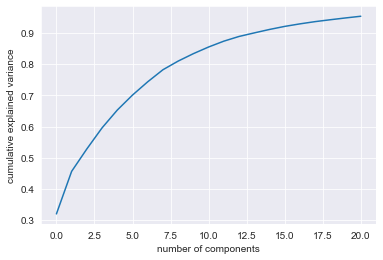

In [27]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [28]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [29]:
X_train_pca

array([[ 2.60078807,  2.58593471, -0.8135273 , ..., -0.51550211,
        -0.10147793,  0.28006346],
       [-2.34364999,  0.20206744, -1.11075793, ...,  0.69026856,
         0.84154361,  0.68660586],
       [-2.63681109, -1.44796161,  0.65799659, ..., -0.05731772,
         0.00755681,  0.29880666],
       ...,
       [-0.83078548, -0.69036913,  0.18536973, ...,  0.03599871,
         0.03344567, -0.07002175],
       [-1.82766828, -0.07463331,  0.74919504, ...,  0.37476601,
         0.29264805, -0.23799387],
       [ 1.67958579, -0.0165918 , -2.28174028, ...,  0.33489194,
         0.24574871, -0.22565665]])

LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

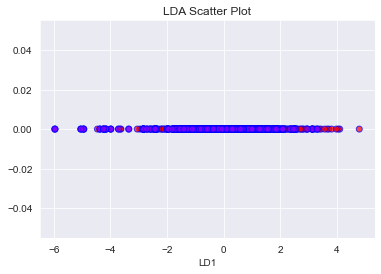

In [31]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [32]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [35]:
# from sklearn.linear_model import LogisticRegression
# 
# # Define the range of values for each hyperparameter
# C = np.linspace(0.01, 1, 15)
# PENALTY = ['l1', 'l2']
# SOLVER = ['liblinear', 'saga']
# 
# PARAM_GRID  = {
#     'C': C,
#     'penalty': PENALTY,
#     'solver': SOLVER
# }
# 
# # Create the logistic regression estimator
# estimator = LogisticRegression(random_state=420)
# 
# # Use grid search and cross-validation to tune the hyper parameters
# model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
# model_searcher.fit(X_train_preprocessed, y_train)
# 
# # The best combination of hyperparameters
# model_searcher.best_params_

In [36]:
# # Get the best estimator
# log_reg_best_estimator = model_searcher.best_estimator_
# y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)
# 
# evaluate_model("Logistic Regression (test data)", y_test, y_test_pred) 

Gradient Boosting model

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 5)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.3911111111111111, 'max_depth': 4, 'n_estimators': 160}

Gradient Boosting (test data)
Accuracy: 0.64
Precision: 0.72
Recall: 0.83
F1-score: 0.77
ROC-AUC score: 0.48


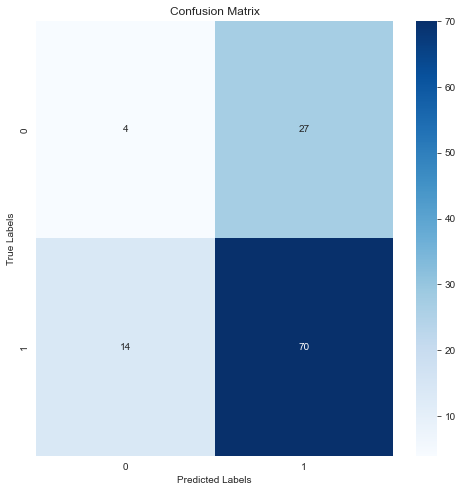

In [38]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Random Forest model

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 140, 15)
MAX_DEPTH = range(2, 6)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)


# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

Random Forest (test data)
Accuracy: 0.6
Precision: 0.74
Recall: 0.69
F1-score: 0.72
ROC-AUC score: 0.52


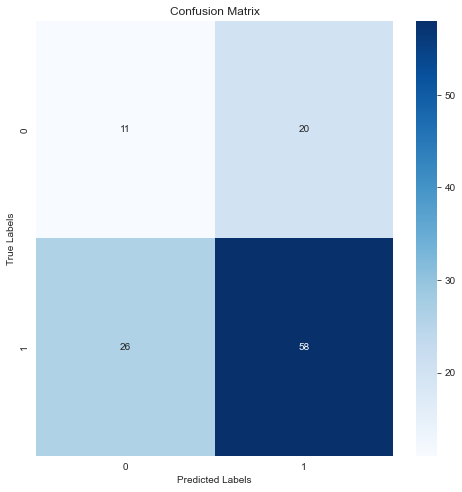

In [40]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [41]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 0.5, 10)
MAX_DEPTH = range(1, 5)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Define the ratio for scale_pos_weight
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

# Create a XGBoost classifier with specific parameters
estimator = XGBClassifier(objective='binary:logistic', scale_pos_weight=ratio)


# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 145}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.63
Precision: 0.72
Recall: 0.8
F1-score: 0.76
ROC-AUC score: 0.48


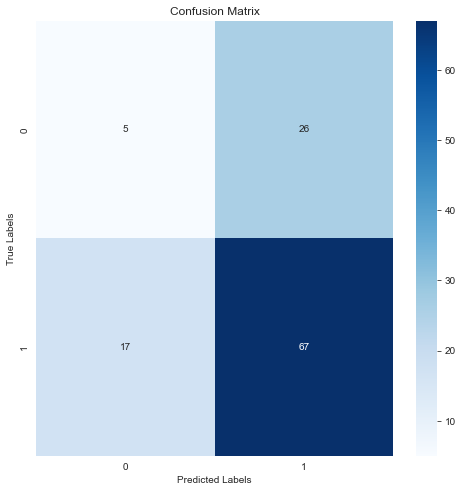

In [42]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [43]:
!pip install pytorch-tabnet
!pip install optuna

In [44]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [45]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 19),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet = TabNetClassifier(**best_params)
tabnet.fit(X_train_np, y_train)
best_params

[I 2023-08-22 12:32:47,933] A new study created in memory with name: no-name-212e1fa9-f78d-47da-96a4-e6dbccae0e24



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51978


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:33:00,660] Trial 0 finished with value: 0.5197772657450077 and parameters: {'n_d': 27, 'n_a': 14, 'n_steps': 15, 'gamma': 0.9368148385102321, 'n_independent': 7, 'n_shared': 5, 'lambda_sparse': 0.05749955203504807}. Best is trial 0 with value: 0.5197772657450077.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:33:06,976] Trial 1 finished with value: 0.575652841781874 and parameters: {'n_d': 21, 'n_a': 12, 'n_steps': 6, 'gamma': 0.8398177300549993, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.08340911006596023}. Best is trial 1 with value: 0.575652841781874.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.57565

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.57604


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:33:15,978] Trial 2 finished with value: 0.5760368663594471 and parameters: {'n_d': 23, 'n_a': 37, 'n_steps': 15, 'gamma': 1.9619666551931163, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.04028206047476776}. Best is trial 2 with value: 0.5760368663594471.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.58679


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:33:50,930] Trial 3 finished with value: 0.5867895545314901 and parameters: {'n_d': 42, 'n_a': 28, 'n_steps': 19, 'gamma': 1.8442432004205966, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.09246913094286723}. Best is trial 3 with value: 0.5867895545314901.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.5768


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:34:23,293] Trial 4 finished with value: 0.576804915514593 and parameters: {'n_d': 31, 'n_a': 55, 'n_steps': 17, 'gamma': 0.5133034984266265, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.04979577602226451}. Best is trial 3 with value: 0.5867895545314901.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.57258


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:34:43,685] Trial 5 finished with value: 0.5725806451612903 and parameters: {'n_d': 41, 'n_a': 53, 'n_steps': 9, 'gamma': 0.30970656130710994, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.06583077011925981}. Best is trial 3 with value: 0.5867895545314901.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.56874


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:35:20,226] Trial 6 finished with value: 0.5687403993855606 and parameters: {'n_d': 24, 'n_a': 26, 'n_steps': 18, 'gamma': 1.7698438037544473, 'n_independent': 8, 'n_shared': 5, 'lambda_sparse': 0.020265653400841546}. Best is trial 3 with value: 0.5867895545314901.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:35:21,976] Trial 7 finished with value: 0.5633640552995393 and parameters: {'n_d': 23, 'n_a': 48, 'n_steps': 2, 'gamma': 1.473439113639905, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.0822651074909462}. Best is trial 3 with value: 0.5867895545314901.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.56336

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.59005


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:35:41,583] Trial 8 finished with value: 0.5900537634408602 and parameters: {'n_d': 37, 'n_a': 46, 'n_steps': 14, 'gamma': 1.0697304481793068, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.007927309576947249}. Best is trial 8 with value: 0.5900537634408602.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.54877


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:35:46,560] Trial 9 finished with value: 0.5487711213517665 and parameters: {'n_d': 35, 'n_a': 18, 'n_steps': 5, 'gamma': 1.2395971126214036, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.030840519118992507}. Best is trial 8 with value: 0.5900537634408602.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.59351


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:36:04,523] Trial 10 finished with value: 0.5935099846390168 and parameters: {'n_d': 60, 'n_a': 63, 'n_steps': 12, 'gamma': 0.13526180061817517, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.008079053668368169}. Best is trial 10 with value: 0.5935099846390168.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.69201


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:36:33,524] Trial 11 finished with value: 0.6920122887864824 and parameters: {'n_d': 61, 'n_a': 64, 'n_steps': 11, 'gamma': 0.11078461696029895, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.0007358742912264684}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.55799


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:36:48,808] Trial 12 finished with value: 0.5579877112135176 and parameters: {'n_d': 63, 'n_a': 64, 'n_steps': 11, 'gamma': 0.10386339091900759, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.002325692678469521}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.5384


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:37:02,990] Trial 13 finished with value: 0.5384024577572964 and parameters: {'n_d': 64, 'n_a': 63, 'n_steps': 10, 'gamma': 0.12108978975151588, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.0007747764581609714}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.65476


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:37:36,831] Trial 14 finished with value: 0.6547619047619048 and parameters: {'n_d': 51, 'n_a': 57, 'n_steps': 12, 'gamma': 0.5642767418502483, 'n_independent': 2, 'n_shared': 8, 'lambda_sparse': 0.017117318867276715}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.60829


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:37:45,662] Trial 15 finished with value: 0.6082949308755761 and parameters: {'n_d': 52, 'n_a': 41, 'n_steps': 8, 'gamma': 0.592457253605065, 'n_independent': 2, 'n_shared': 8, 'lambda_sparse': 0.019126234792626144}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_auc = 0.63345


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:38:36,424] Trial 16 finished with value: 0.6334485407066052 and parameters: {'n_d': 53, 'n_a': 56, 'n_steps': 13, 'gamma': 0.48546986876008286, 'n_independent': 5, 'n_shared': 8, 'lambda_sparse': 0.01990272903278095}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.52535


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:38:43,526] Trial 17 finished with value: 0.5253456221198156 and parameters: {'n_d': 10, 'n_a': 57, 'n_steps': 6, 'gamma': 0.7010031713511937, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.029451584628882005}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.66897


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:39:00,718] Trial 18 finished with value: 0.6689708141321045 and parameters: {'n_d': 54, 'n_a': 48, 'n_steps': 8, 'gamma': 0.4604896903373912, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.011122641408103495}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.59716


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:39:07,717] Trial 19 finished with value: 0.59715821812596 and parameters: {'n_d': 57, 'n_a': 47, 'n_steps': 4, 'gamma': 0.3365898347824571, 'n_independent': 6, 'n_shared': 9, 'lambda_sparse': 0.010804231495902511}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.57373


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:39:17,053] Trial 20 finished with value: 0.5737327188940092 and parameters: {'n_d': 47, 'n_a': 34, 'n_steps': 8, 'gamma': 0.3411777871704237, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.001893224633167417}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.56912


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:39:30,591] Trial 21 finished with value: 0.5691244239631337 and parameters: {'n_d': 50, 'n_a': 51, 'n_steps': 11, 'gamma': 0.7000795089512668, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.01437336076564142}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.65207


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:39:50,147] Trial 22 finished with value: 0.6520737327188939 and parameters: {'n_d': 57, 'n_a': 59, 'n_steps': 9, 'gamma': 0.4032148988569033, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.028309431358184277}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.59447


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:40:05,213] Trial 23 finished with value: 0.5944700460829493 and parameters: {'n_d': 46, 'n_a': 42, 'n_steps': 13, 'gamma': 0.6265064206098285, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.013297306794179502}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.5818


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:40:18,643] Trial 24 finished with value: 0.5817972350230415 and parameters: {'n_d': 56, 'n_a': 59, 'n_steps': 7, 'gamma': 0.26060300117132873, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.0223868155784712}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.58545


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:40:36,690] Trial 25 finished with value: 0.5854454685099846 and parameters: {'n_d': 60, 'n_a': 51, 'n_steps': 11, 'gamma': 0.46512810300526053, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.0005003750110715549}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.62788


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:40:41,916] Trial 26 finished with value: 0.6278801843317973 and parameters: {'n_d': 47, 'n_a': 59, 'n_steps': 3, 'gamma': 0.24030849040807178, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.010683757513383817}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.56951


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:41:12,936] Trial 27 finished with value: 0.5695084485407067 and parameters: {'n_d': 54, 'n_a': 42, 'n_steps': 16, 'gamma': 0.45625432563234536, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.03229453447987474}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 21 with best_epoch = 11 and best_val_0_auc = 0.5553


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:41:42,735] Trial 28 finished with value: 0.555299539170507 and parameters: {'n_d': 42, 'n_a': 50, 'n_steps': 10, 'gamma': 0.22938354855801693, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.023783177759114447}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51459


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:41:51,125] Trial 29 finished with value: 0.5145929339477726 and parameters: {'n_d': 60, 'n_a': 61, 'n_steps': 13, 'gamma': 0.7738421861790722, 'n_independent': 1, 'n_shared': 4, 'lambda_sparse': 0.015444953511204073}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.58737


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:42:13,461] Trial 30 finished with value: 0.5873655913978495 and parameters: {'n_d': 50, 'n_a': 54, 'n_steps': 15, 'gamma': 0.5798493714499702, 'n_independent': 6, 'n_shared': 7, 'lambda_sparse': 0.038473138861015735}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.61022


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:42:35,429] Trial 31 finished with value: 0.6102150537634409 and parameters: {'n_d': 56, 'n_a': 59, 'n_steps': 9, 'gamma': 0.41104939916811056, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.02450774809702602}. Best is trial 11 with value: 0.6920122887864824.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.59101


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-08-22 12:42:53,346] Trial 32 finished with value: 0.5910138248847927 and parameters: {'n_d': 58, 'n_a': 64, 'n_steps': 7, 'gamma': 0.3448621909775485, 'n_independent': 4, 'n_shared': 9, 'lambda_sparse': 0.005876818407170992}. Best is trial 11 with value: 0.6920122887864824.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.251   |  0:00:01s
epoch 1  | loss: 2.7171  |  0:00:02s
epoch 2  | loss: 1.95364 |  0:00:03s
epoch 3  | loss: 1.85118 |  0:00:04s
epoch 4  | loss: 2.31122 |  0:00:06s
epoch 5  | loss: 1.31828 |  0:00:07s
epoch 6  | loss: 1.75891 |  0:00:08s
epoch 7  | loss: 1.19909 |  0:00:09s
epoch 8  | loss: 1.16161 |  0:00:10s
epoch 9  | loss: 1.00262 |  0:00:12s
epoch 10 | loss: 0.82591 |  0:00:13s
epoch 11 | loss: 0.87078 |  0:00:14s
epoch 12 | loss: 0.84056 |  0:00:15s
epoch 13 | loss: 0.78662 |  0:00:16s
epoch 14 | loss: 0.77975 |  0:00:17s
epoch 15 | loss: 0.71368 |  0:00:19s
epoch 16 | loss: 0.71571 |  0:00:20s
epoch 17 | loss: 0.66299 |  0:00:21s
epoch 18 | loss: 0.64179 |  0:00:22s
epoch 19 | loss: 0.62235 |  0:00:23s
epoch 20 | loss: 0.60774 |  0:00:25s
epoch 21 | loss: 0.61507 |  0:00:26s
epoch 22 | loss: 0.61299 |  0:00:27s
epoch 23 | loss: 0.59022 |  0:00:28s
epoch 24 | loss: 0.57528 |  0:00:29s
epoch 25 | loss: 0.56974 |  0:00:30s
epoch 26 | loss: 0.56403 |  0:00:32s
e

{'n_d': 61,
 'n_a': 64,
 'n_steps': 11,
 'gamma': 0.11078461696029895,
 'n_independent': 1,
 'n_shared': 10,
 'lambda_sparse': 0.0007358742912264684}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.61
Precision: 0.74
Recall: 0.71
F1-score: 0.73
ROC-AUC score: 0.52


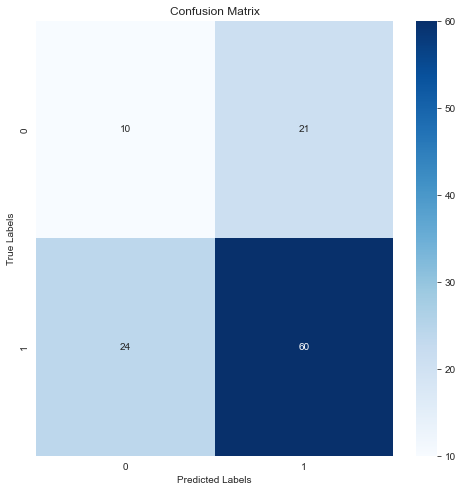

In [46]:
# Evaluate final model on test set
y_test_pred = tabnet.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [47]:
the_best_model_ever = gb_best_estimator

Feature importance

In [48]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
DVA_Max_Fixations_Pre,0.070480
DVA_Min_Gaze_Pre,0.067397
DVA_Median_Fixations_Pre,0.061447
DVA_Sem_Fixations_Pre,0.053655
DVA_Std_Gaze_Pre,0.053441
DVA_AUC_Gaze_Pre,0.048114
DVA_Mean_Gaze_Pre,0.045887
DVA_Min_Fixations_Pre,0.045886
DVA_Mean_Fixations_Pre,0.044011
DVA_Median_Gaze_Pre,0.038265
